In [1]:
!pip install xlrd==2.0.1
!pip install pandas==1.1.5
!pip install numpy==1.19.5
!pip install scipy==1.1.0
!pip install openpyxl==3.0.9
!pip install pyproj==3.0.1
!pip install geopandas==0.8.0
!pip install matplotlib==3.3.4
!pip install folium==0.12.1.post1
!pip install seaborn==0.11.2

In [3]:
import xlrd
import pandas as pd
import numpy as np
import scipy
import openpyxl

from pyproj import Proj, transform

import warnings
warnings.filterwarnings('ignore')

In [69]:
def find_outliers_IQR_multivariant_df(df, name_of_column):

   q1=df[name_of_column].quantile(0.25)

   q3=df[name_of_column].quantile(0.75)

   IQR=q3-q1

   outliers = df[((df[name_of_column]<(q1-1.5*IQR)) | (df[name_of_column]>(q3+1.5*IQR)))]

   return outliers

In [5]:
gemeinden = pd.read_csv('./Daten/Gemeinden_Final.csv', sep=',')


In [6]:
gemeinden.head(10)

,Gemeindename,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,Linksparteien,Mitteparteien,Rechtsparteien,Kantonsname,Region,Altenquotient,Jugendquotient,Abhaengigenquotient,Agglomerationen 2012,Charakter
0,Kammersrohr,2549,32,-17.948718,33.684211,3.125000,12.500000,62.500000,25.000000,0.000000,...,18.082789,35.185185,45.370370,Solothurn,EspaceMittelland,0.400000,0.200000,0.600000,0.0,Land
1,Bister,6172,33,0.000000,5.679862,6.060606,9.090909,60.606061,30.303030,0.000000,...,25.490196,48.952242,38.084795,Valais,Genferseeregion,0.500000,0.150000,0.650000,6002.0,Agglomeration
2,Schelten,708,35,-14.634146,6.294964,5.714286,17.142857,65.714286,17.142857,28.169014,...,37.990196,17.647059,35.784314,Bern,EspaceMittelland,0.260870,0.260870,0.521739,0.0,Land
3,Berken,972,41,-16.326531,29.496403,2.439024,2.439024,65.853659,31.707317,0.000000,...,4.464286,11.607143,80.803571,Bern,EspaceMittelland,0.481481,0.037037,0.518519,0.0,Land
4,Rebévelier,715,42,-10.638298,11.830986,2.380952,26.190476,47.619048,26.190476,24.096386,...,17.467949,15.384615,50.801282,Bern,EspaceMittelland,0.550000,0.550000,1.100000,0.0,Land
5,Cerentino,5309,45,-25.000000,2.238806,6.666667,8.888889,53.333333,37.777778,0.000000,...,25.974026,21.008159,46.753247,Ticino,Tessin,0.708333,0.166667,0.875000,0.0,Land
6,Linescio,5315,47,-2.083333,7.057057,10.638298,2.127660,70.212766,27.659574,0.000000,...,25.000000,11.746795,70.625000,Ticino,Tessin,0.393939,0.030303,0.424242,0.0,Land
7,Bosco/Gurin,5304,49,2.083333,2.226261,8.163265,6.122449,63.265306,30.612245,0.000000,...,28.658537,27.493746,37.195122,Ticino,Tessin,0.483871,0.096774,0.580645,0.0,Land
8,Meienried,389,50,-5.660377,76.923077,2.000000,16.000000,64.000000,20.000000,36.697248,...,28.658537,27.493746,37.195122,Bern,EspaceMittelland,0.312500,0.250000,0.562500,0.0,Land
9,Campo (Vallemaggia),5307,51,4.081633,1.177557,17.647059,3.921569,56.862745,39.215686,0.000000,...,38.888889,22.186610,42.592593,Ticino,Tessin,0.689655,0.068966,0.758621,0.0,Land


In [7]:
# importing packages 
import seaborn as sns 
import matplotlib.pyplot as plt

## Schweizer Gemeinden: Deskriptive Statistik
# Bevölkerung (Einwohner)

In [8]:
gemeinden.drop_duplicates(subset=['Gemeindecode'], inplace=True) # Komisch nach BFS sollten es  2172 Gemeinden für 1.1.2021 respektive 2148 Gemeinden für 1.1.2022 sein. Im Orginaldatensatz sind 2172 - wo gingen diese verloren???? Es fehlen über 300000 Einwohner
gemeinden['Einwohner'].describe()

count      2142.000000
mean       4003.111111
std       12959.372080
min          32.000000
25%         728.750000
50%        1592.000000
75%        3882.750000
max      420217.000000
Name: Einwohner, dtype: float64

In [9]:
gemeinden['Einwohner'].sum() 

8574664

In [10]:
gemeinden['Einwohner'].median() 

1592.0

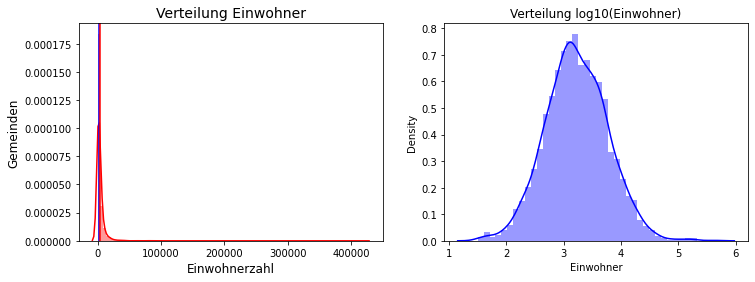

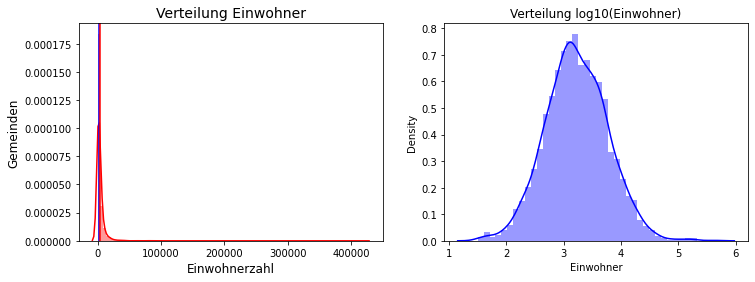

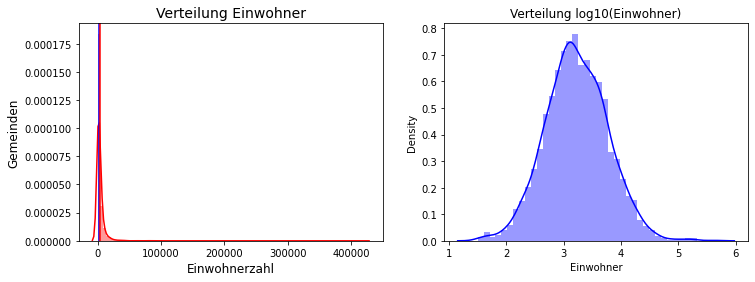

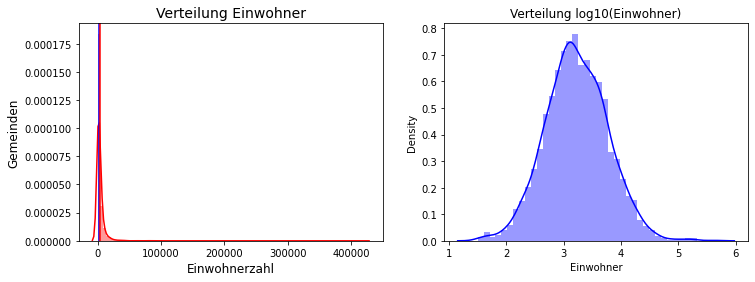

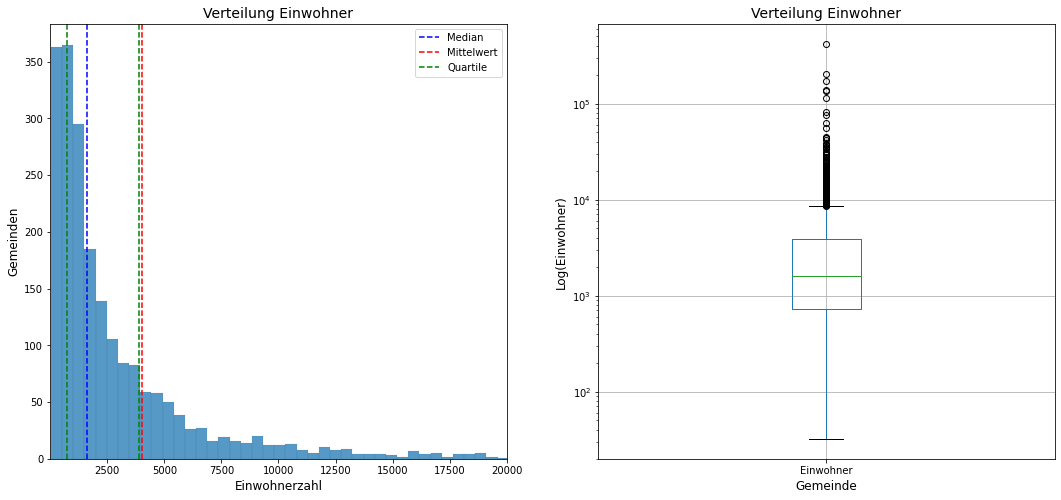

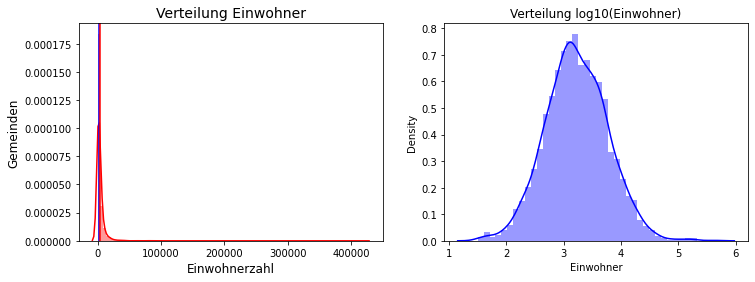

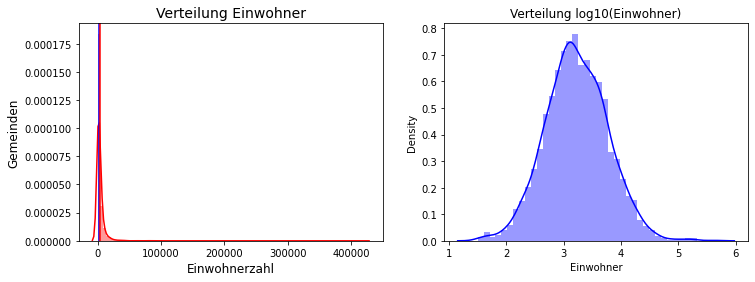

In [17]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(gemeinden['Einwohner'],bins=100,color='r',ax=ax)
ax.set_title('Verteilung Einwohner', size=14)
plt.xlabel("Einwohnerzahl", size=12)
plt.ylabel("Gemeinden", size=12)
plt.axvline(x=gemeinden['Einwohner'].median(), color='blue')
plt.axvline(x=gemeinden['Einwohner'].mean(),
            color='red')


ax=f.add_subplot(122)
sns.distplot(np.log10(gemeinden['Einwohner']),bins=40,color='b',ax=ax)
ax.set_title('Verteilung log10(Einwohner)')
plt.show()

extreme rechtsschief, langschwänzige Verteilung --> logaritmiert sieht die Verteilung einigermassen Normalverteilt aus --> schauen wir mal die Verteilung der Gemeinden 20'000 und kleiner an und in einem Boxplot. Interessant ist dass der Mittelwert ausserhalb des IQR liegt.

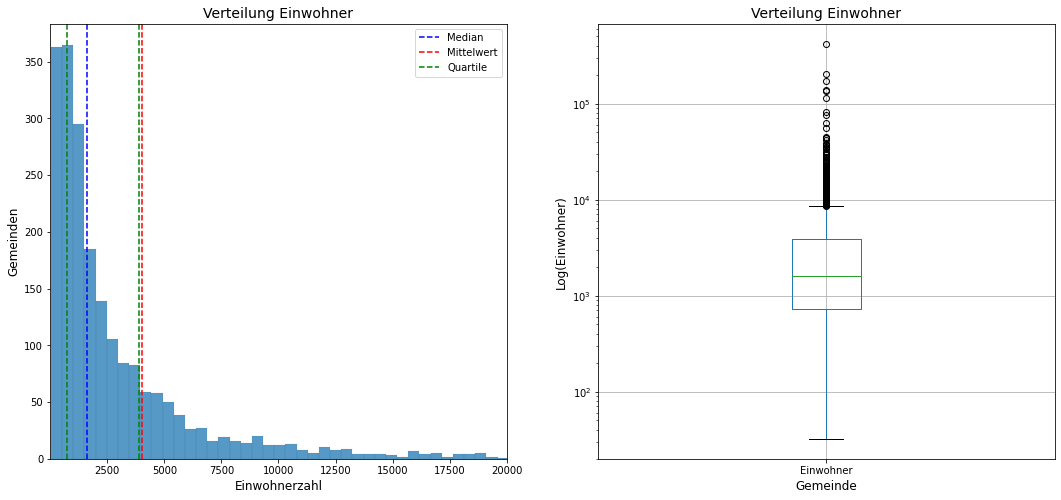

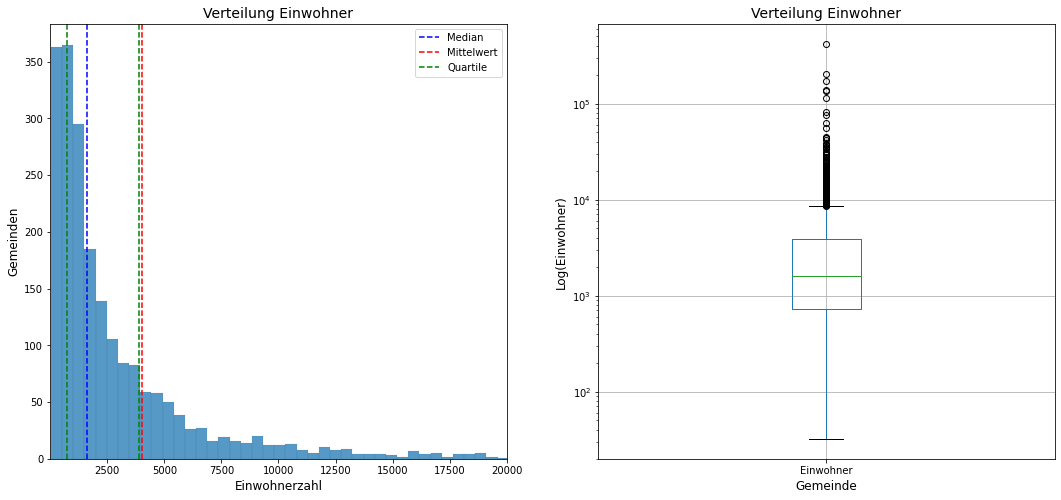

In [19]:
f= plt.figure(figsize=(18,8))
ax = f.add_subplot(121)
sns.histplot(gemeinden['Einwohner'], legend=True)
ax.set_xlim(1,20000)
ax.set_title('Verteilung Einwohner', size=14)
plt.xlabel("Einwohnerzahl", size=12)
plt.ylabel("Gemeinden", size=12)
plt.axvline(x=gemeinden['Einwohner'].median(), color='blue', linestyle='dashed', label="Median")
plt.axvline(x=gemeinden['Einwohner'].mean(),
            color='red', linestyle='dashed', label="Mittelwert")
plt.axvline(x=gemeinden['Einwohner'].quantile(0.25), color='green', linestyle='dashed', label="Q25%")
plt.axvline(x=gemeinden['Einwohner'].quantile(0.75), color='green', linestyle='dashed', label="Q75%")
labels = ["Median", "Mittelwert", "Quartile"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[0:], labels = labels)

ax = f.add_subplot(122)
boxplot = gemeinden.boxplot(column=['Einwohner'])
ax.set_title('Verteilung Einwohner', size=14)
plt.xlabel("Gemeinde", size=12)
plt.ylabel("Log(Einwohner)", size=12)#, 'Altenquotient', 'Jugendquotient'
plt.yscale('log')
plt.show()

In [20]:
def find_outliers_IQR_multivariant_df(df, name_of_column):

   q1=df[name_of_column].quantile(0.25)

   q3=df[name_of_column].quantile(0.75)

   IQR=q3-q1

   outliers = df[((df[name_of_column]<(q1-1.5*IQR)) | (df[name_of_column]>(q3+1.5*IQR)))]

   print('WhyskerMin: %4d' %(q1-1.5*IQR))
   print('WhyskerMin: %5d' %(q3+1.5*IQR))
   return outliers

In [24]:
gemeinden[gemeinden['Einwohner'] > 50000].sort_values(by='Einwohner', ascending=False)

,Gemeindename,Gemeindecode,Einwohner,Veränderung in %,Bevölkerungs-dichte pro km²,Ausländer in %,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,Rohe Heiratssziffer,...,Linksparteien,Mitteparteien,Rechtsparteien,Kantonsname,Region,Altenquotient,Jugendquotient,Abhaengigenquotient,Agglomerationen 2012,Charakter
2141,Zürich,261,420217,12.701921,4778.994655,32.458468,17.494295,67.748568,14.757137,6.038890,...,46.667426,21.760805,26.089776,Zürich,Zürich,0.217822,0.258224,0.476046,261.0,Stadt
2140,Genève,6621,203951,8.791273,12810.992462,47.954656,17.897436,66.272291,15.830273,4.943699,...,53.908640,11.297088,32.779033,Genève,Genferseeregion,0.238867,0.270059,0.508926,6621.0,Stadt
2139,Basel,2701,173232,6.136653,7263.396226,37.955459,16.893530,64.076499,19.029971,5.181047,...,62.390459,11.571595,31.821326,Basel-Stadt,Nordwestschweiz,0.296988,0.263646,0.560635,2701.0,Stadt
2138,Lausanne,5586,139408,9.065021,3368.970517,42.387811,19.380523,65.920894,14.698583,4.531109,...,62.872043,9.966737,24.673277,Vaud,Genferseeregion,0.222973,0.293997,0.516970,5586.0,Stadt
2137,Bern,351,134591,8.208649,2607.342115,24.862732,16.713599,66.067568,17.218833,5.996856,...,55.172860,22.198132,17.870797,Bern,EspaceMittelland,0.260625,0.252977,0.513602,351.0,Stadt
2136,Winterthur,230,113173,11.711810,1662.597326,24.535004,19.974729,63.804088,16.221183,6.070464,...,40.727894,25.013755,29.854817,Zürich,Zürich,0.254234,0.313063,0.567298,230.0,Stadt
2135,Luzern,1061,82257,6.150392,2826.701031,24.407649,16.238132,64.333735,19.428134,5.623734,...,46.693356,25.712555,28.025127,Luzern,Zentralschweiz,0.301990,0.252405,0.554394,1061.0,Stadt
2134,St. Gallen,3203,76090,4.291451,1932.199086,31.491655,18.100933,64.146406,17.752661,5.463294,...,42.707227,25.723020,31.540700,St. Gallen,Ostschweiz,0.276752,0.282182,0.558934,3203.0,Stadt
2133,Lugano,5192,62615,3.946014,824.641117,38.438074,17.334505,60.308233,22.357263,3.227345,...,25.959608,22.101457,55.081716,Ticino,Tessin,0.370717,0.287432,0.658148,5192.0,Stadt
2132,Biel/Bienne,371,55602,8.591293,2623.973572,33.973598,19.414769,62.366462,18.218769,4.171143,...,52.435799,18.472173,24.924950,Bern,EspaceMittelland,0.292124,0.311301,0.603426,371.0,Stadt


In [27]:
einwohner_groesser50000 = gemeinden[gemeinden['Einwohner'] > 50000]['Einwohner'].sum()

In [37]:
einwohner = 0;
index = 0;
for column_name in gemeinden.sort_values(by='Einwohner', ascending=False):
    print(column_name)
    einwohner = einwohner + gemeinden[gemeinden['Gemeindename']==column_name]['Einwohner']
    if einwohner >= einwohner_groesser50000:
        break;
    index += 1
print(index)

Gemeindename


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
gemeinde_einwohner_outliers = find_outliers_IQR_multivariant_df(gemeinden, 'Einwohner')
#gemeinde_einwohner_outliers.drop_duplicates(subset=['Gemeindecode'], inplace=True)
gemeinde_einwohner_outliers.sort_values(by='Einwohner')
gemeinde_einwohner_outliers['Einwohner'].sum() 

WhyskerMin: -3977
WhyskerMin:  8828


4369582

In [38]:
#group by team and sum the points
einwohner_verteilung_charakter = gemeinden.groupby(['Charakter'])['Einwohner'].sum().reset_index()


## Die Schweiz ein Land von Agglos?

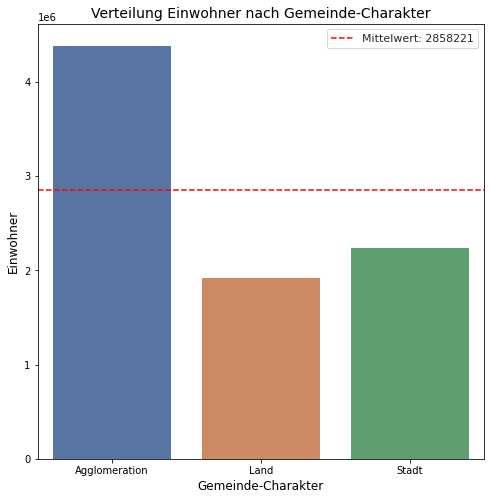

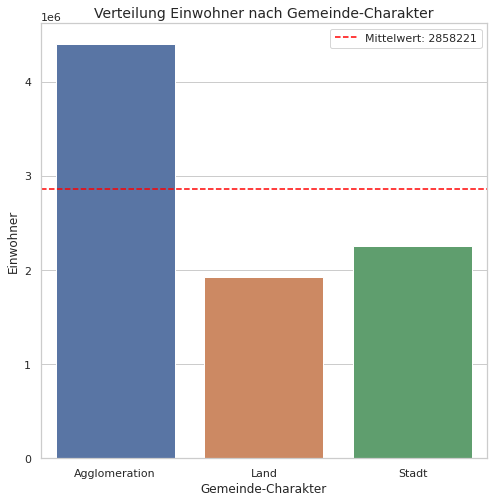

In [40]:
f= plt.figure(figsize=(8,8))
ax = f.add_subplot(111)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Charakter", y="Einwohner", data = einwohner_verteilung_charakter)
ax.set_title('Verteilung Einwohner nach Gemeinde-Charakter', size=14)
plt.xlabel("Gemeinde-Charakter", size=12)
plt.ylabel("Einwohner", size=12)
plt.axhline(y=einwohner_verteilung_charakter['Einwohner'].mean(),
             color='red', linestyle='dashed', label="Mittelwert")
labels = ['Mittelwert: %d' % round(einwohner_verteilung_charakter['Einwohner'].mean())]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[0:], labels = labels)
plt.show()

Über die Hälfte lebt in der Agglomerationen, wenn wir die Städte dazu zählen sind es eher 3 von 4 welche im Urbanen Gebiet leben. Zu 2012 https://www.bfs.admin.ch/bfs/de/home/statistiken/kataloge-datenbanken/medienmitteilungen.assetdetail.38618.html scheint die Urbanisierung nochmals zugenommen zu haben.

In [41]:
einwohner_verteilung = einwohner_verteilung_charakter.set_index('Charakter')


In [42]:
print(einwohner_verteilung)
print('Stadt-/Agglomeration Bevölkerung %.2f%% '  % (100.0 * (einwohner_verteilung.loc[['Agglomeration', 'Stadt'], 'Einwohner'].sum()) / (einwohner_verteilung.loc[['Agglomeration', 'Stadt', 'Land'], 'Einwohner'].sum())))

               Einwohner
Charakter               
Agglomeration    4397019
Land             1926137
Stadt            2251508
Stadt-/Agglomeration Bevölkerung 77.54% 


In [43]:
einwohner_verteilung_alter = gemeinden[['Charakter', 'Einwohner', '0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr']]
einwohner_verteilung_alter['0-19 Jahre'] = round(einwohner_verteilung_alter['Einwohner'] * einwohner_verteilung_alter['0-19 Jahre'] / 100)
einwohner_verteilung_alter['20-64 Jahre'] = round(einwohner_verteilung_alter['Einwohner'] * einwohner_verteilung_alter['20-64 Jahre'] / 100)
einwohner_verteilung_alter['65 Jahre und mehr'] = round(einwohner_verteilung_alter['Einwohner'] * einwohner_verteilung_alter['65 Jahre und mehr'] / 100)
einwohner_verteilung_alter2 = einwohner_verteilung_alter.groupby(['0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr']).sum()
einwohner_verteilung_alter = einwohner_verteilung_alter.groupby(['Charakter'])['0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr'].sum().reset_index().set_index('Charakter')
print(einwohner_verteilung_alter)


               0-19 Jahre  20-64 Jahre  65 Jahre und mehr
Charakter                                                
Agglomeration    902845.0    2657424.0           836750.0
Land             398619.0    1160919.0           366599.0
Stadt            409238.0    1446053.0           396217.0


In [50]:

einwohner_verteilung_alter_percent = einwohner_verteilung_alter.copy()

einwohner_verteilung_alter_percent["Total"] = einwohner_verteilung['Einwohner']
print(einwohner_verteilung_alter_percent)
einwohner_verteilung_alter_percent['0-19 Jahre'] = einwohner_verteilung_alter_percent['0-19 Jahre'] / einwohner_verteilung_alter_percent['Total'] * 100 
einwohner_verteilung_alter_percent['20-64 Jahre'] = einwohner_verteilung_alter_percent['20-64 Jahre'] / einwohner_verteilung_alter_percent['Total'] * 100 
einwohner_verteilung_alter_percent['65 Jahre und mehr'] = einwohner_verteilung_alter_percent['65 Jahre und mehr'] / einwohner_verteilung_alter_percent['Total'] * 100 
einwohner_verteilung_alter_percent = einwohner_verteilung_alter_percent.drop('Total',1)


               0-19 Jahre  20-64 Jahre  65 Jahre und mehr    Total
Charakter                                                         
Agglomeration    902845.0    2657424.0           836750.0  4397019
Land             398619.0    1160919.0           366599.0  1926137
Stadt            409238.0    1446053.0           396217.0  2251508
               0-19 Jahre  20-64 Jahre  65 Jahre und mehr
Charakter                                                
Agglomeration   20.533116    60.436946          19.029938
Land            20.695257    60.271881          19.032862
Stadt           18.176173    64.225977          17.597850


               0-19 Jahre  20-64 Jahre  65 Jahre und mehr
Charakter                                                
Agglomeration   20.533116    60.436946          19.029938
Land            20.695257    60.271881          19.032862
Stadt           18.176173    64.225977          17.597850


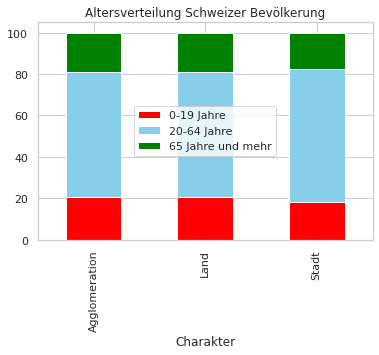

In [55]:
# bei der Altersverteilung ist Land näher bei der Agglomeration als die Stadt, allerdings ist es grafisch schwer zu sehen. 
print(einwohner_verteilung_alter_percent);
einwohner_verteilung_alter_percent.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], title='Altersverteilung Schweizer Bevölkerung')
plt.show()

In [56]:
einwohner_verteilung_alter2 = einwohner_verteilung_alter.sum(axis=0)
type(einwohner_verteilung_alter2)

pandas.core.series.Series

In [57]:
einwohner_verteilung_alter2.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], title='Altersverteilung Schweizer Bevölkerung')


<AxesSubplot:title={'center':'Altersverteilung Schweizer Bevölkerung'}>

In [64]:
# 5 / 8 sind im Erwerbstätigenalter
einwohner_verteilung_alter2 = pd.DataFrame(einwohner_verteilung_alter2)
einwohner_verteilung_alter2.T

,0-19 Jahre,20-64 Jahre,65 Jahre und mehr
0,1650440.0,5087410.0,1544170.0


<Figure size 432x288 with 0 Axes>

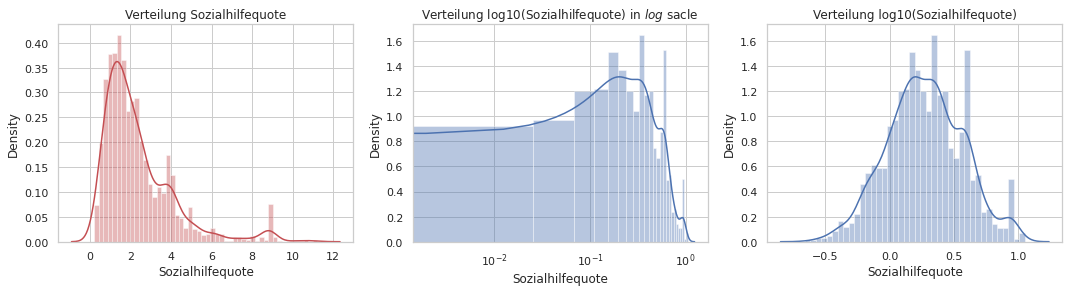

In [60]:
plt.clf()
f= plt.figure(figsize=(18,4))

ax=f.add_subplot(131)
sns.distplot(gemeinden['Sozialhilfequote'],bins=50,color='r',ax=ax)
ax.set_title('Verteilung Sozialhilfequote')

ax=f.add_subplot(132)
df = gemeinden[gemeinden['Sozialhilfequote'] > 0]
sns.distplot(np.log10(df['Sozialhilfequote']),bins=40,color='b',ax=ax)
ax.set_title('Verteilung log10(Sozialhilfequote) in $log$ sacle')
ax.set_xscale('log');

ax=f.add_subplot(133)
sns.distplot(np.log10(df['Sozialhilfequote']),bins=40,color='b',ax=ax)
ax.set_title('Verteilung log10(Sozialhilfequote)')
plt.show()
# wieder extreme rechtsschief mit grossen ausreissern --> Boxplot anstelle mittler grafik


In [61]:
df['Sozialhilfequote'].describe()

count    2142.000000
mean        2.366167
std         1.743550
min         0.220000
25%         1.200000
50%         1.860000
75%         2.970000
max        11.210000
Name: Sozialhilfequote, dtype: float64

In [75]:
df_outliers_sozialhilfequote = find_outliers_IQR_multivariant_df(df,'Sozialhilfequote')
#print(df_outliers_sozialhilfequote.sort_values(by='Sozialhilfequote', ascending=False))

           Gemeindename  Gemeindecode  Einwohner  Veränderung in %  \
1558           Tavannes           713       3570          2.645198   
2126  La Chaux-de-Fonds          6421      37494         -0.026664   
2132        Biel/Bienne           371      55602          8.591293   
1670              Brügg           733       4370          5.149182   
1760        Saint-Imier           443       5140          7.734228   
...                 ...           ...        ...               ...   
634              Rennaz          5412        872         30.538922   
2066           Burgdorf           404      16587          7.889944   
605             Tecknau          2862        839          2.442002   
138             Rueyres          5534        265          8.606557   
2136         Winterthur           230     113173         11.711810   

      Bevölkerungs-dichte pro km²  Ausländer in %  0-19 Jahre  20-64 Jahre  \
1558                   241.542625       25.182073   22.156863    60.056022   
212

## was ist los ähned des Röschtigrabens???
90% der wirklich hohen Sozialhilfe-Quoten-Gemeinden sind Westschweizer --> wieso?

In [82]:
gr=df_outliers_sozialhilfequote.groupby(['Region'])['Gemeindename'].count()
gr.sort_values(ascending=False)


Region
EspaceMittelland    45
Genferseeregion     41
Nordwestschweiz      5
Zentralschweiz       3
Tessin               3
Ostschweiz           2
Zürich               1
Name: Gemeindename, dtype: int64

In [83]:
gr=df_outliers_sozialhilfequote.groupby(['Kantonskürzel'])['Gemeindename'].count()
gr.sort_values(ascending=False)

Kantonskürzel
VD    31
BE    24
NE     8
SO     7
GE     7
JU     5
BL     4
VS     3
TI     3
GR     2
ZH     1
UR     1
SZ     1
LU     1
FR     1
BS     1
Name: Gemeindename, dtype: int64

In [87]:
gr=df_outliers_sozialhilfequote.groupby(['Charakter'])['Gemeindename'].count()
gemeinde_character_count = gemeinden.groupby(['Charakter'])['Gemeindename'].count()
df = pd.concat([gr, gemeinde_character_count], axis=1)
print(df)
gr.sort_values(ascending=False)
gemeinde_character_count

               Gemeindename  Gemeindename
Charakter                                
Agglomeration            47          1039
Land                     40          1056
Stadt                    13            47


Charakter
Agglomeration    1039
Land             1056
Stadt              47
Name: Gemeindename, dtype: int64

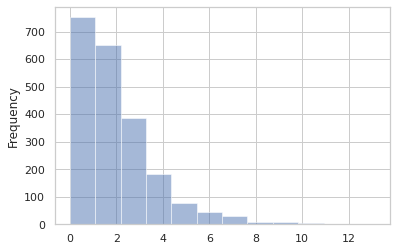

In [64]:
plt.clf()
ax = gemeinden['Leerwohnungs-ziffer'].plot.hist(bins=12, alpha=0.5)
plt.show()
# ebenfalls rechtsschief --> log10 ob es nach normalverteilt aussieht...

<Figure size 432x288 with 0 Axes>

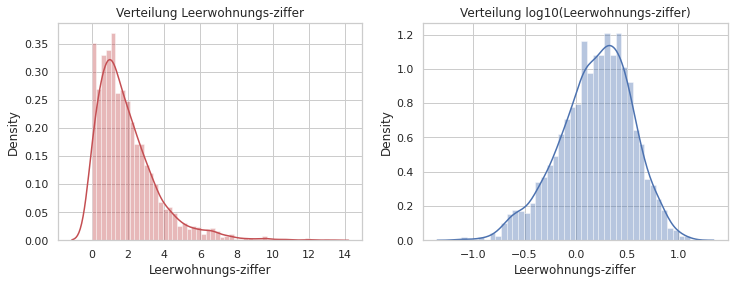

In [65]:
plt.clf()
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(gemeinden['Leerwohnungs-ziffer'],bins=50,color='r',ax=ax)
ax.set_title('Verteilung Leerwohnungs-ziffer')

ax=f.add_subplot(122)
df = gemeinden[gemeinden['Leerwohnungs-ziffer'] > 0]
sns.distplot(np.log10(df['Leerwohnungs-ziffer']),bins=40,color='b',ax=ax)
ax.set_title('Verteilung log10(Leerwohnungs-ziffer)')
#ax.set_xscale('log');
plt.show()


In [66]:
print(gemeinden.shape)
gemeinden['Log_Sozialhilfequote'] = np.log(gemeinden['Sozialhilfequote'])
gemeinden['Log_Leerwohnungs-ziffer'] = np.log(gemeinden['Leerwohnungs-ziffer'])
gemeinden.shape

(2142, 58)


(2142, 60)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


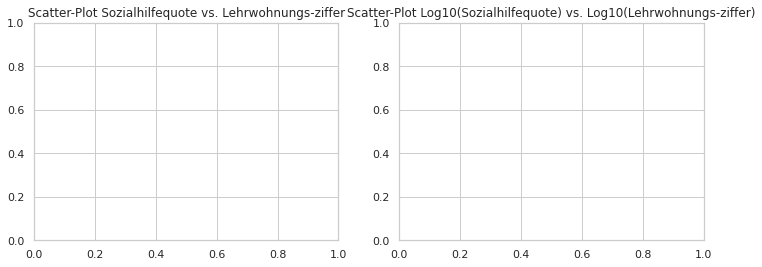

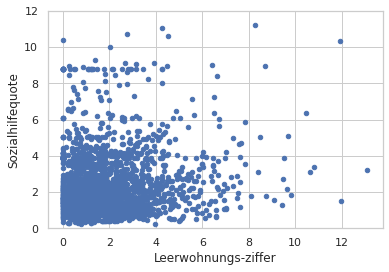

<Figure size 432x288 with 0 Axes>

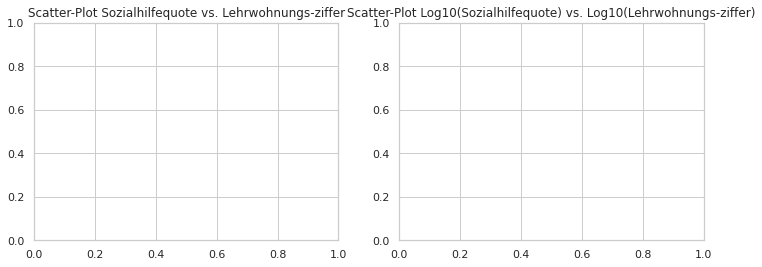

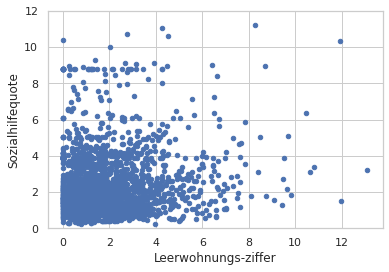

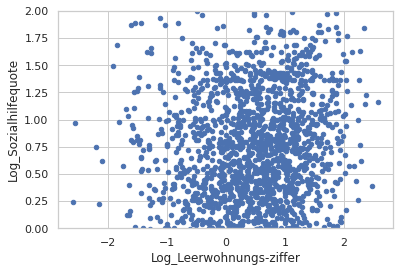

In [68]:
plt.clf()
f= plt.figure(figsize=(12,4))
ax= f.add_subplot(121)
var = 'Leerwohnungs-ziffer'
data = pd.concat([gemeinden['Sozialhilfequote'], gemeinden[var]], axis=1)
data.plot.scatter(x=var, y='Sozialhilfequote', ylim=(0,12))
ax.set_title("Scatter-Plot Sozialhilfequote vs. Lehrwohnungs-ziffer");


ax= f.add_subplot(122)
var = 'Log_Leerwohnungs-ziffer'
data = pd.concat([gemeinden['Log_Sozialhilfequote'], gemeinden[var]], axis=1)
data.plot.scatter(x=var, y='Log_Sozialhilfequote', ylim=(0,2))
ax.set_title("Scatter-Plot Log10(Sozialhilfequote) vs. Log10(Lehrwohnungs-ziffer)");
plt.show()

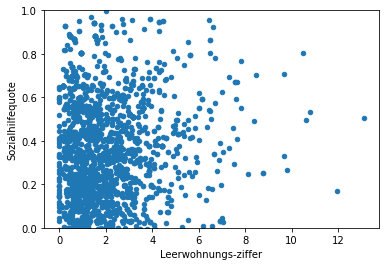

In [ ]:
var = 'Leerwohnungs-ziffer'
data = pd.concat([np.log10(gemeinden['Sozialhilfequote']), gemeinden[var]], axis=1)
data.plot.scatter(x=var, y='Sozialhilfequote', ylim=(0,1));

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


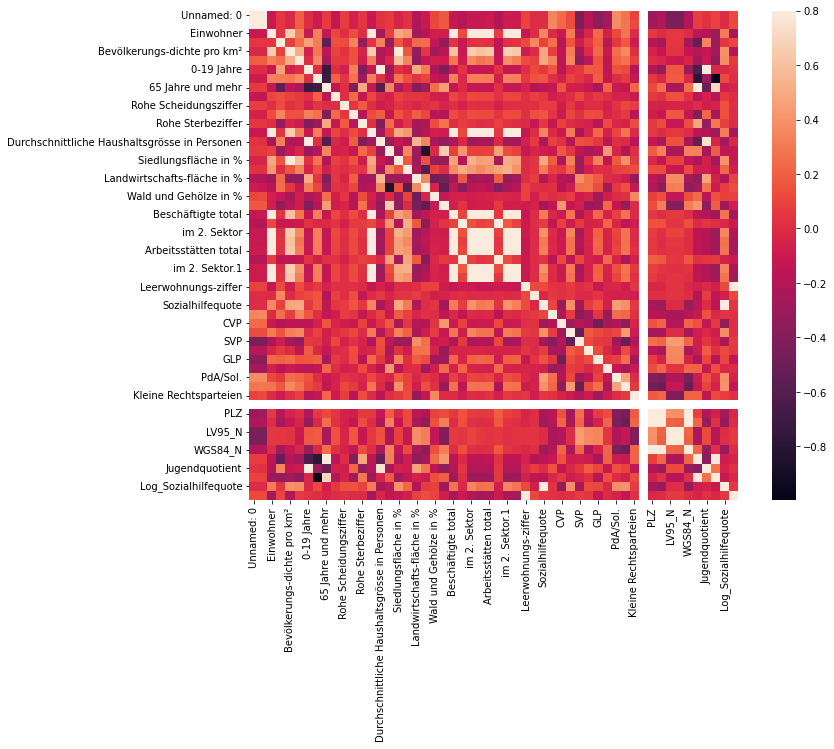

In [ ]:
#correlation matrix
corrmat = gemeinden.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
matrix = gemeinden.corr()
print(matrix)

                                               Unnamed: 0  Gemeindecode  \
Unnamed: 0                                       1.000000      0.997154   
Gemeindecode                                     0.997154      1.000000   
Einwohner                                       -0.114106     -0.107428   
Veränderung in %                                 0.045809      0.048402   
Bevölkerungs-dichte pro km²                     -0.025537     -0.019777   
Ausländer in %                                   0.184711      0.196184   
0-19 Jahre                                       0.004967      0.001055   
20-64 Jahre                                     -0.092789     -0.094681   
65 Jahre und mehr                                0.059779      0.063910   
Rohe Heiratssziffer                             -0.131492     -0.133933   
Rohe Scheidungsziffer                            0.072562      0.074934   
Rohe Geburtenziffer                             -0.053618     -0.057817   
Rohe Sterbeziffer        

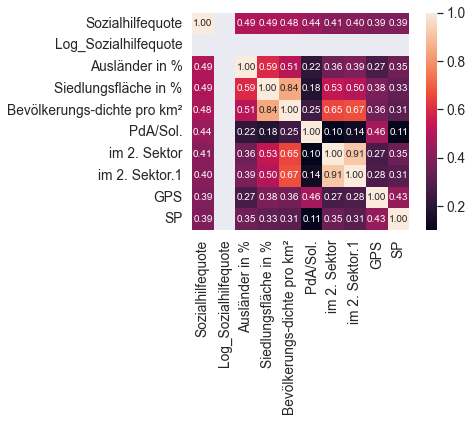

In [ ]:
#sozialhilfequote correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Sozialhilfequote')['Sozialhilfequote'].index
cm = np.corrcoef(gemeinden[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

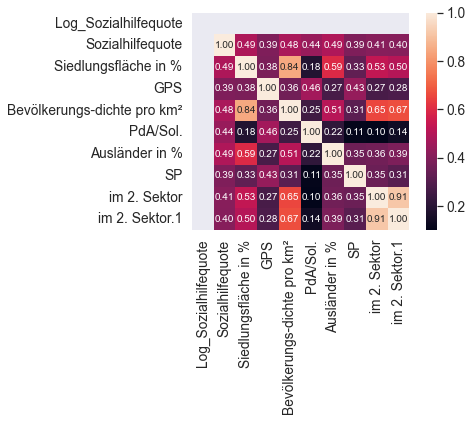

In [ ]:
#sozialhilfequote correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Log_Sozialhilfequote')['Log_Sozialhilfequote'].index
cm = np.corrcoef(gemeinden[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()